# XOR_SA2

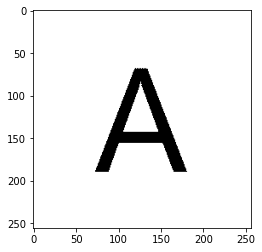

In [25]:
import numpy as np

from PIL import Image
from matplotlib import pyplot as plt

secret = np.logical_not(np.array(Image.open("../A_256.png").convert("1"), dtype=bool))
plt.imshow(secret, cmap="gray")

False


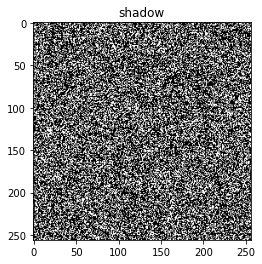

False


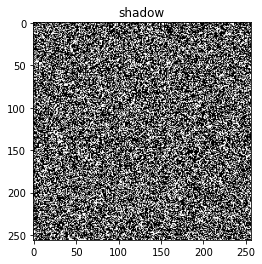

In [26]:
from optimize import optimize_xor_sa2

K = 3
# result = optimize_xor_sa2(K, ws=50)
# print(result)
# if result.success:
variables = np.array([[0.219773917, 0.043152887, 0.409956905, 0.327116291],
                      [0.739620974, 0.23944371, 0, 0.020935316],
                      [0.195270113, 1, 0.726761524, 0]])
p0 = np.array(variables[0])  # 白色选择随机数发生器的概率
p1 = np.array(variables[1])  # 黑色选择随机数发生器的概率
rx = np.array(variables[2])  # 随机数发生器输出0(False/白色)的概率

shadows = [np.zeros(secret.shape, dtype=bool) for _ in range(K)]
D = np.zeros(secret.shape, dtype=int)
for (i, j), is_black in np.ndenumerate(secret):
    prob = p1 if is_black else p0
    rand_no = np.random.choice(a=K + 1, p=prob)
    D[i, j] = rand_no
    rand_white = rx[rand_no]
    for sh in shadows:
        sh[i, j] = np.random.choice(a=[False, True], p=[rand_white, 1 - rand_white])

plt.title("shadow")
plt.imshow(shadows[0], cmap="gray")
print((shadows[0] == shadows[1]).all())

In [27]:
from optimize import xor_safety_penalty_list

xor_safety_penalty_list(variables)

[0.00012948848901573774, 0.0005493793056790641]

[0.00012948848901573774, 0.0005493793056790641]

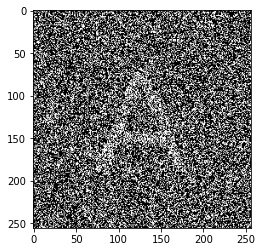

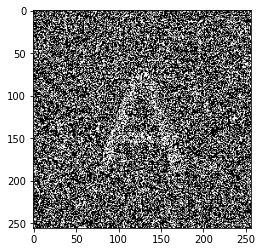

In [28]:
reveal_old = shadows[0]
for sd in shadows[1:]:
    reveal_old = np.logical_xor(reveal_old, sd)
plt.imshow(reveal_old, cmap="gray")

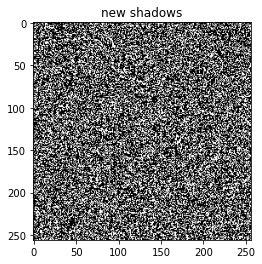

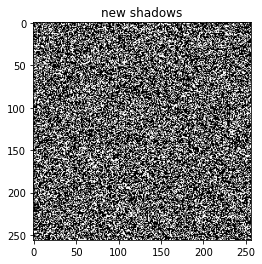

In [29]:
new_shadows = [np.zeros(secret.shape, dtype=bool) for _ in range(K)]
for (i, j), is_black in np.ndenumerate(secret):
    rand_white = rx[D[i, j]]
    for sh in new_shadows:
        sh[i, j] = np.random.choice(a=[False, True], p=[rand_white, 1 - rand_white])

plt.title("new shadows")
plt.imshow(new_shadows[0], cmap="gray")

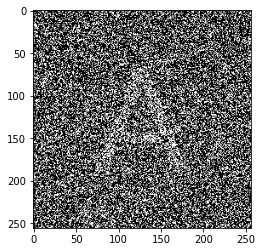

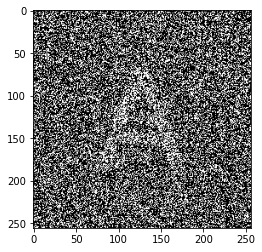

In [30]:
reveal_new = new_shadows[0]
for sd in new_shadows[1:]:
    reveal_new = np.logical_xor(reveal_new, sd)
plt.imshow(reveal_new, cmap="gray")